In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Read the data 

raw_data = pd.read_csv('student_data.csv')


In [3]:
raw_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
raw_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
features = raw_data.columns
features

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
raw_data['total_score'] = raw_data['G1'] + raw_data['G2'] + raw_data['G3']
raw_data['average'] = round(raw_data['total_score']/3, 0)
raw_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,total_score,average
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,22,7.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,31,10.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,37,12.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,42,14.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,37,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,2,1,2,5,4,10,11,10,31,10.0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,1,1,1,4,15,15,16,46,15.0
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,5,6,11,12,9,32,11.0
647,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,6,10,10,10,30,10.0


In [7]:
numerical_features = raw_data.select_dtypes(exclude = "O").columns
numerical_features

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'total_score', 'average'],
      dtype='object')

In [8]:
categorical_features = raw_data.select_dtypes(include = "O").columns
categorical_features

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [9]:
numeric_features = [f for f in raw_data.columns if raw_data[f].dtype != 'O']
numeric_features

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'total_score',
 'average']

In [10]:
category_features = [f for f in features if raw_data[f].dtype == 'O']
category_features

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [11]:
for c in categorical_features:
    print("{} -> {} -> {} ". format(c, len(raw_data[c].unique()), raw_data[c].unique()))

school -> 2 -> ['GP' 'MS'] 
sex -> 2 -> ['F' 'M'] 
address -> 2 -> ['U' 'R'] 
famsize -> 2 -> ['GT3' 'LE3'] 
Pstatus -> 2 -> ['A' 'T'] 
Mjob -> 5 -> ['at_home' 'health' 'other' 'services' 'teacher'] 
Fjob -> 5 -> ['teacher' 'other' 'services' 'health' 'at_home'] 
reason -> 4 -> ['course' 'other' 'home' 'reputation'] 
guardian -> 3 -> ['mother' 'father' 'other'] 
schoolsup -> 2 -> ['yes' 'no'] 
famsup -> 2 -> ['no' 'yes'] 
paid -> 2 -> ['no' 'yes'] 
activities -> 2 -> ['no' 'yes'] 
nursery -> 2 -> ['yes' 'no'] 
higher -> 2 -> ['yes' 'no'] 
internet -> 2 -> ['no' 'yes'] 
romantic -> 2 -> ['no' 'yes'] 


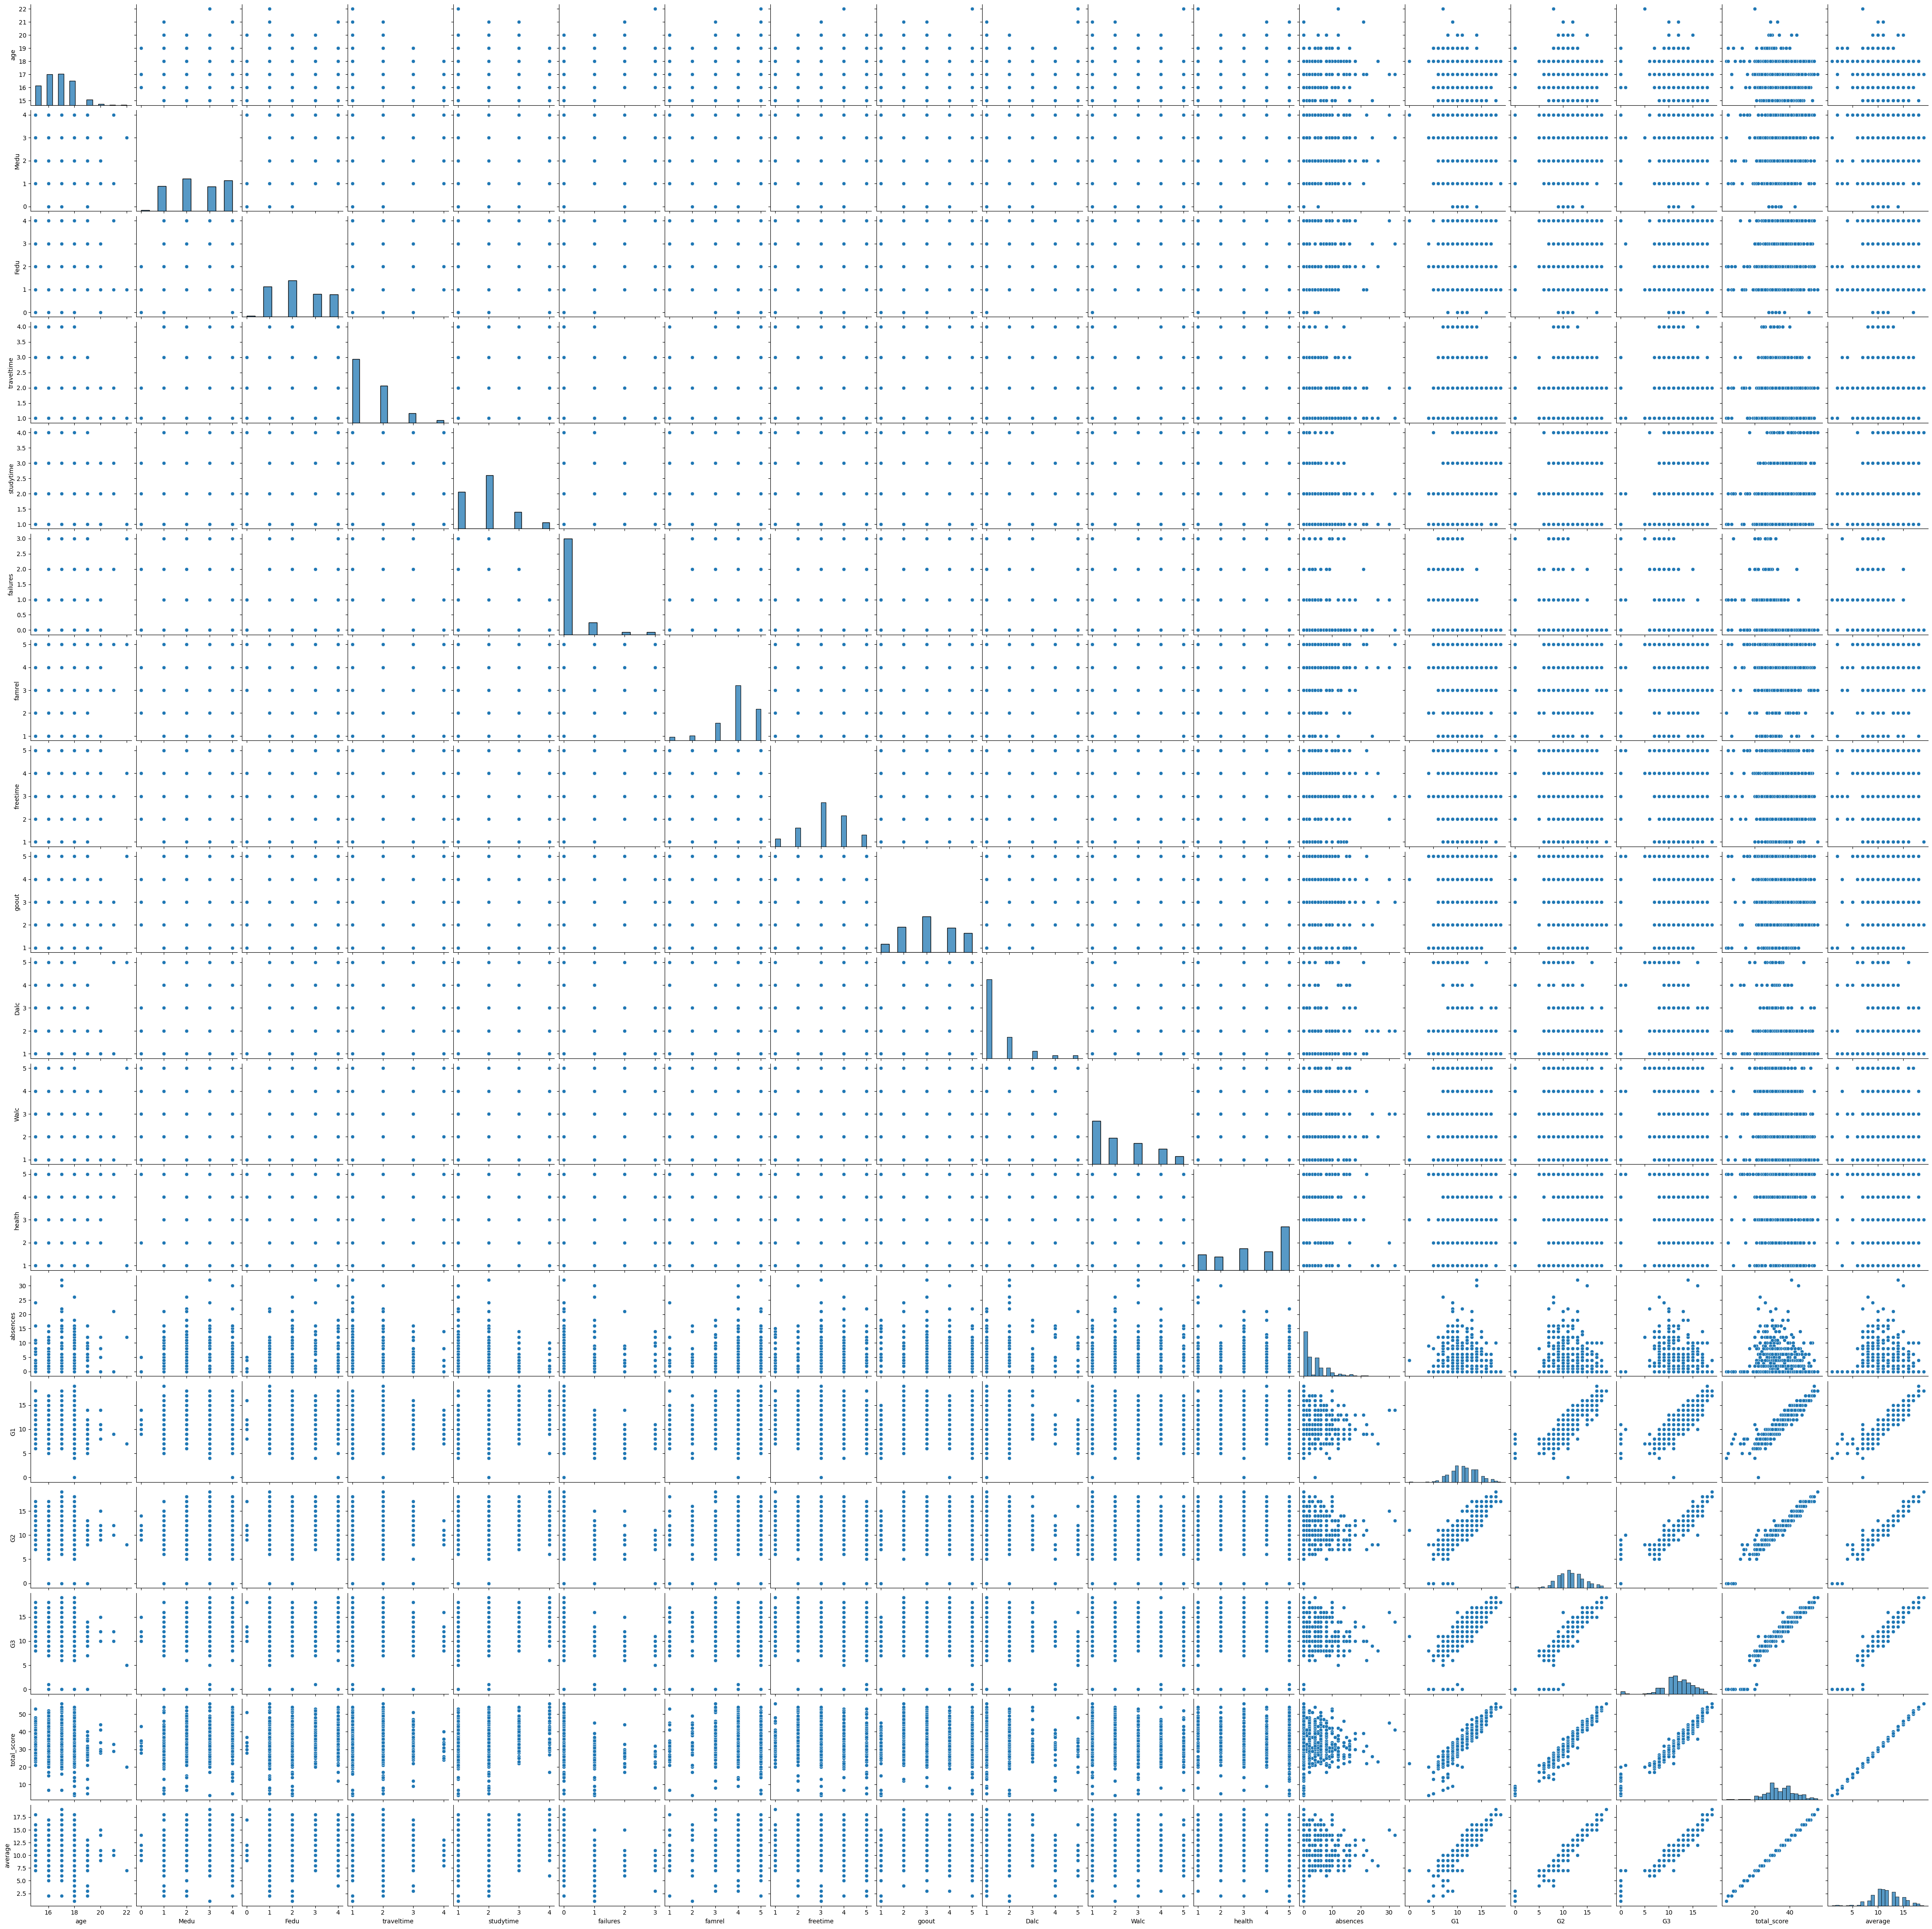

In [12]:
sns.pairplot(raw_data)

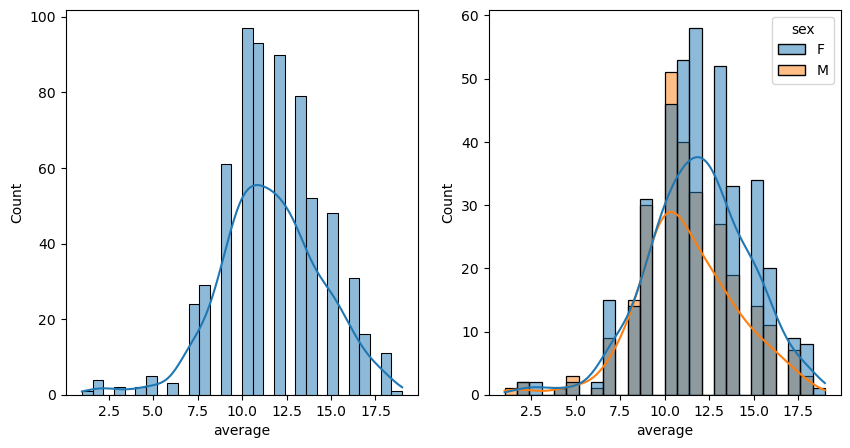

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(121)
sns.histplot(data=raw_data, x='average', bins=30, kde=True)
plt.subplot(122)
sns.histplot(data=raw_data, x='average', kde=True, hue='sex')
plt.show()

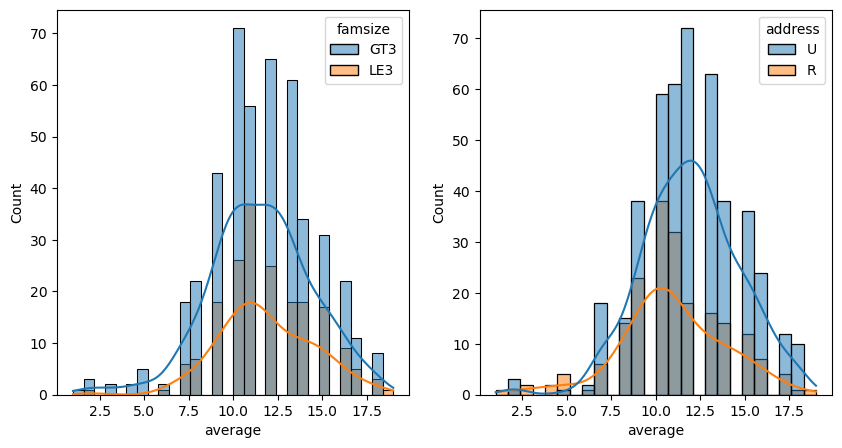

In [14]:
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(121)
sns.histplot(data=raw_data, x='average', bins = 30, kde= True, hue = 'famsize')
plt.subplot(122)
sns.histplot(data=raw_data, x='average',kde = True, hue='address')
plt.show()


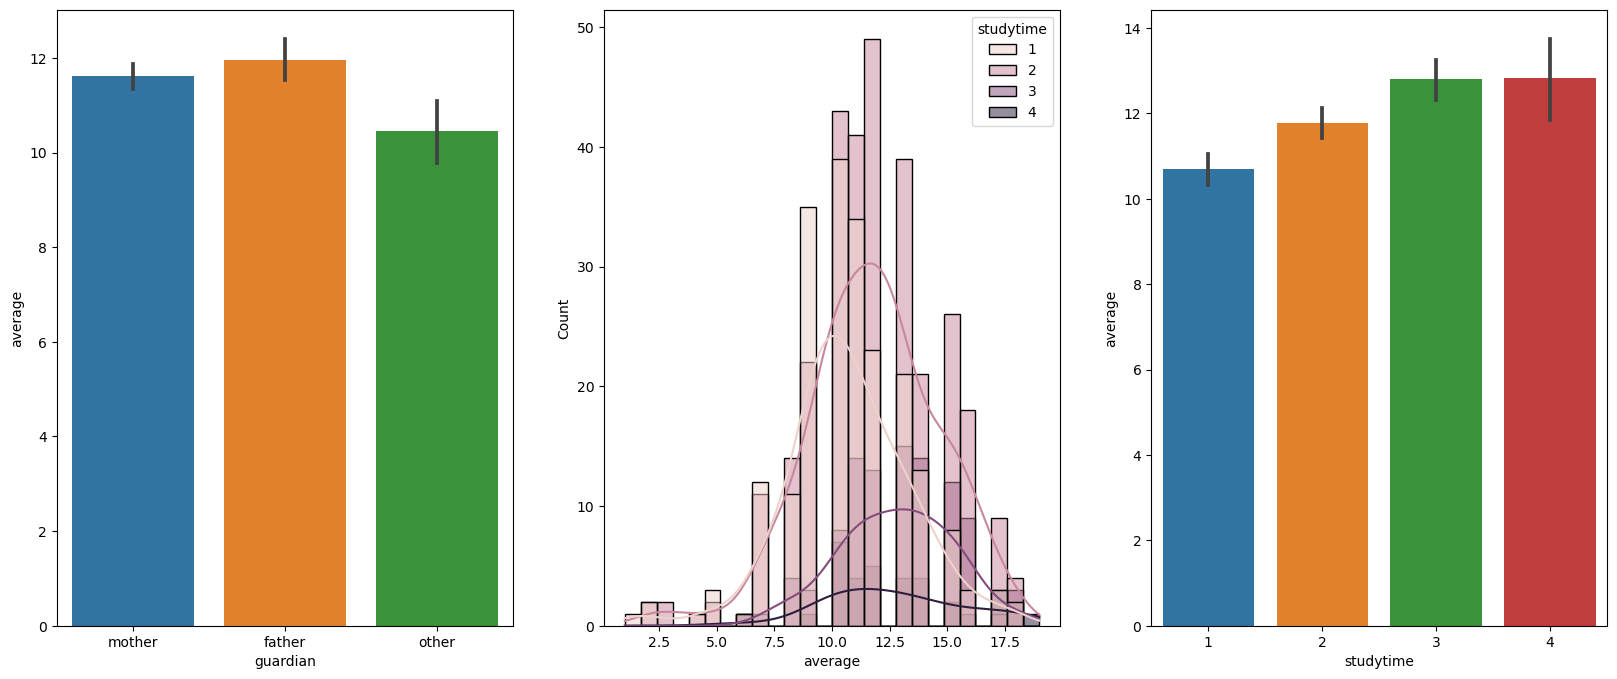

In [15]:
fig, ax =  plt.subplots(1, 3, figsize=(20, 8))
plt.subplot(131)
sns.barplot(data=raw_data, x='guardian', y='average')
plt.subplot(132)
sns.histplot(data=raw_data, x='average', kde=True, hue='studytime')
plt.subplot(133)
sns.barplot(data=raw_data, x='studytime', y='average')
plt.show()

In [16]:
X_data = raw_data.iloc[:,:-1]

In [17]:
X_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,total_score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,22
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,31
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,37
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,42
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,37


In [18]:
Y_data = raw_data.iloc[:,-1]

In [19]:
Y_data.head()

0     7.0
1    10.0
2    12.0
3    14.0
4    12.0
Name: average, dtype: float64

In [20]:
cat = X_data.select_dtypes(include='O').columns
num = X_data.select_dtypes(exclude='O').columns

In [21]:
cat

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [22]:
num

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'total_score'],
      dtype='object')

In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
        [
            ("OHE", cat_transformer, cat),
            ("SS", numeric_transformer, num)
        ]
)

In [24]:
preprocessor

ColumnTransformer(transformers=[('OHE', OneHotEncoder(),
                                 Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')),
                                ('SS', StandardScaler(),
                                 Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'total_score'],
      dtype='object'))])

In [25]:
transformed_data = preprocessor.fit_transform(raw_data)

In [26]:
transformed_data

array([[ 1.        ,  0.        ,  1.        , ..., -0.19581961,
        -0.28065755, -1.51588245],
       [ 1.        ,  0.        ,  1.        , ..., -0.19581961,
        -0.28065755, -0.45625232],
       [ 1.        ,  0.        ,  1.        , ...,  0.49113675,
         0.02911583,  0.25016777],
       ...,
       [ 0.        ,  1.        ,  1.        , ...,  0.14765857,
        -0.90020431, -0.33851563],
       [ 0.        ,  1.        ,  0.        , ..., -0.53929779,
        -0.59043093, -0.573989  ],
       [ 0.        ,  1.        ,  0.        , ..., -0.19581961,
        -0.28065755, -0.33851563]])

In [27]:
transformed_columns = preprocessor.get_feature_names_out()

In [28]:
transformed_columns

array(['OHE__school_GP', 'OHE__school_MS', 'OHE__sex_F', 'OHE__sex_M',
       'OHE__address_R', 'OHE__address_U', 'OHE__famsize_GT3',
       'OHE__famsize_LE3', 'OHE__Pstatus_A', 'OHE__Pstatus_T',
       'OHE__Mjob_at_home', 'OHE__Mjob_health', 'OHE__Mjob_other',
       'OHE__Mjob_services', 'OHE__Mjob_teacher', 'OHE__Fjob_at_home',
       'OHE__Fjob_health', 'OHE__Fjob_other', 'OHE__Fjob_services',
       'OHE__Fjob_teacher', 'OHE__reason_course', 'OHE__reason_home',
       'OHE__reason_other', 'OHE__reason_reputation',
       'OHE__guardian_father', 'OHE__guardian_mother',
       'OHE__guardian_other', 'OHE__schoolsup_no', 'OHE__schoolsup_yes',
       'OHE__famsup_no', 'OHE__famsup_yes', 'OHE__paid_no',
       'OHE__paid_yes', 'OHE__activities_no', 'OHE__activities_yes',
       'OHE__nursery_no', 'OHE__nursery_yes', 'OHE__higher_no',
       'OHE__higher_yes', 'OHE__internet_no', 'OHE__internet_yes',
       'OHE__romantic_no', 'OHE__romantic_yes', 'SS__age', 'SS__Medu',
       'SS__Fe

In [29]:
X_data = pd.DataFrame(transformed_data, columns = transformed_columns)

In [30]:
X_data.head()

,OHE__school_GP,OHE__school_MS,OHE__sex_F,OHE__sex_M,OHE__address_R,OHE__address_U,OHE__famsize_GT3,OHE__famsize_LE3,OHE__Pstatus_A,OHE__Pstatus_T,...,SS__freetime,SS__goout,SS__Dalc,SS__Walc,SS__health,SS__absences,SS__G1,SS__G2,SS__G3,SS__total_score
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,-0.171647,0.693785,-0.543555,-0.997695,-0.371042,0.073433,-4.155470,-0.195820,-0.280658,-1.515882
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,-0.171647,-0.157380,-0.543555,-0.997695,-0.371042,-0.357863,-0.874570,-0.195820,-0.280658,-0.456252
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,-0.171647,-1.008546,0.538553,0.560678,-0.371042,0.504730,0.219064,0.491137,0.029116,0.250168
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,-1.123771,-1.008546,-0.543555,-0.997695,1.012903,-0.789159,0.948153,0.834615,0.648663,0.838851
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,-0.171647,-1.008546,-0.543555,-0.218508,1.012903,-0.789159,-0.145481,0.491137,0.338889,0.250168


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, random_state = True, test_size = 0.2)

In [32]:
print('X_train shape: ', X_train.shape)
print('Y_train shape: ', Y_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_test shape: ', Y_test.shape)

X_train shape:  (519, 60)
Y_train shape:  (519,)
X_test shape:  (130, 60)
Y_test shape:  (130,)


In [33]:
training_correlation = X_train.corr()
training_correlation

,OHE__school_GP,OHE__school_MS,OHE__sex_F,OHE__sex_M,OHE__address_R,OHE__address_U,OHE__famsize_GT3,OHE__famsize_LE3,OHE__Pstatus_A,OHE__Pstatus_T,...,SS__freetime,SS__goout,SS__Dalc,SS__Walc,SS__health,SS__absences,SS__G1,SS__G2,SS__G3,SS__total_score
OHE__school_GP,1.000000,-1.000000,-0.110950,0.110950,-0.363863,0.363863,0.011975,-0.011975,0.004144,-0.004144,...,-0.033712,-0.039243,-0.005803,0.025574,0.082641,0.175069,0.291422,0.256706,0.279133,0.287666
OHE__school_MS,-1.000000,1.000000,0.110950,-0.110950,0.363863,-0.363863,-0.011975,0.011975,-0.004144,0.004144,...,0.033712,0.039243,0.005803,-0.025574,-0.082641,-0.175069,-0.291422,-0.256706,-0.279133,-0.287666
OHE__sex_F,-0.110950,0.110950,1.000000,-1.000000,0.039577,-0.039577,0.139677,-0.139677,0.059882,-0.059882,...,-0.149340,-0.062205,-0.287121,-0.326240,-0.166897,-0.053770,0.116523,0.113599,0.132059,0.126530
OHE__sex_M,0.110950,-0.110950,-1.000000,1.000000,-0.039577,0.039577,-0.139677,0.139677,-0.059882,0.059882,...,0.149340,0.062205,0.287121,0.326240,0.166897,0.053770,-0.116523,-0.113599,-0.132059,-0.126530
OHE__address_R,-0.363863,0.363863,0.039577,-0.039577,1.000000,-1.000000,0.075094,-0.075094,-0.140986,0.140986,...,-0.004022,-0.017364,0.034279,-0.007151,-0.002510,-0.070912,-0.161704,-0.156349,-0.176578,-0.172612
OHE__address_U,0.363863,-0.363863,-0.039577,0.039577,-1.000000,1.000000,-0.075094,0.075094,0.140986,-0.140986,...,0.004022,0.017364,-0.034279,0.007151,0.002510,0.070912,0.161704,0.156349,0.176578,0.172612
OHE__famsize_GT3,0.011975,-0.011975,0.139677,-0.139677,0.075094,-0.075094,1.000000,-1.000000,-0.235087,0.235087,...,0.026800,0.005232,-0.079400,-0.087228,-0.003616,0.006326,-0.072892,-0.058438,-0.066241,-0.068618
OHE__famsize_LE3,-0.011975,0.011975,-0.139677,0.139677,-0.075094,0.075094,-1.000000,1.000000,0.235087,-0.235087,...,-0.026800,-0.005232,0.079400,0.087228,0.003616,-0.006326,0.072892,0.058438,0.066241,0.068618
OHE__Pstatus_A,0.004144,-0.004144,0.059882,-0.059882,-0.140986,0.140986,-0.235087,0.235087,1.000000,-1.000000,...,-0.012390,-0.014023,-0.039449,-0.065438,-0.037435,0.099356,0.018193,0.004122,0.019160,0.014534
OHE__Pstatus_T,-0.004144,0.004144,-0.059882,0.059882,0.140986,-0.140986,0.235087,-0.235087,-1.000000,1.000000,...,0.012390,0.014023,0.039449,0.065438,0.037435,-0.099356,-0.018193,-0.004122,-0.019160,-0.014534


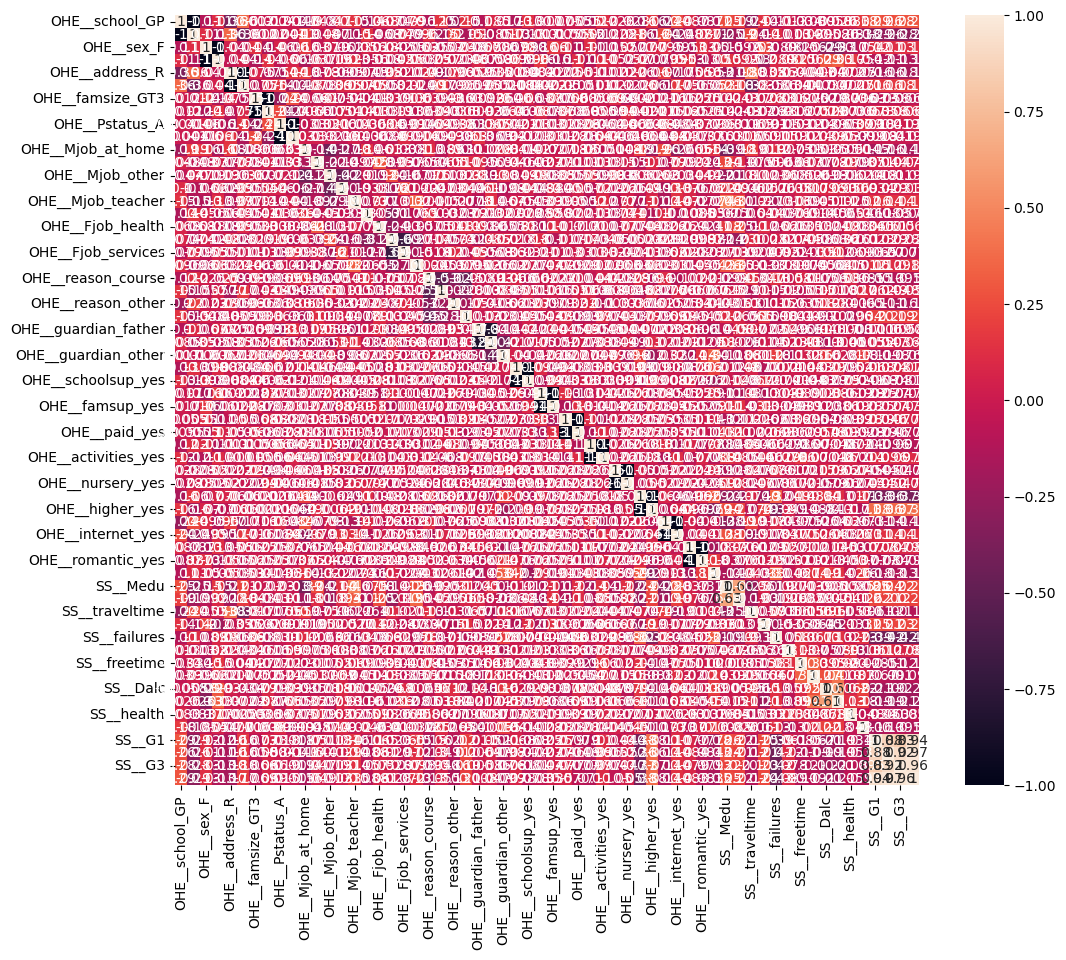

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(training_correlation, annot = True)
plt.show()

In [35]:
def correlation(dataset, threshold):
    col_matrix = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold:
                colname = corr_matrix.columns[i]
                col_matrix.add(colname)
    return col_matrix

In [36]:
corr_features = correlation(X_train, 0.7)
print("No of columns that are highly correlated :", len(set(corr_features)))
print("The correlated features are: ", corr_features)
      

No of columns that are highly correlated : 3
The correlated features are:  {'SS__total_score', 'SS__G2', 'SS__G3'}


In [37]:
X_train.drop(corr_features, axis = 1)

,OHE__school_GP,OHE__school_MS,OHE__sex_F,OHE__sex_M,OHE__address_R,OHE__address_U,OHE__famsize_GT3,OHE__famsize_LE3,OHE__Pstatus_A,OHE__Pstatus_T,...,SS__studytime,SS__failures,SS__famrel,SS__freetime,SS__goout,SS__Dalc,SS__Walc,SS__health,SS__absences,SS__G1
354,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.083653,-0.374305,1.119748,-0.171647,-0.157380,-0.543555,-0.218508,-1.754987,-0.357863,0.219064
495,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,-1.122808,-0.374305,0.072606,1.732603,0.693785,-0.543555,-0.997695,0.320930,-0.789159,0.948153
307,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.083653,-0.374305,1.119748,0.780478,0.693785,1.620662,1.339864,1.012903,-0.789159,-0.145481
90,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.290114,-0.374305,0.072606,-0.171647,-0.157380,-0.543555,0.560678,0.320930,-0.357863,-0.874570
577,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.083653,1.312667,1.119748,0.780478,0.693785,1.620662,0.560678,-1.063015,0.936026,-0.510025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,-1.122808,-0.374305,-0.974536,-0.171647,-0.157380,-0.543555,-0.218508,-1.754987,0.936026,0.219064
645,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-1.754987,0.073433,1.312697
72,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.083653,-0.374305,-0.974536,-0.171647,0.693785,0.538553,1.339864,1.012903,-0.357863,0.583608
235,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.290114,-0.374305,0.072606,-0.171647,0.693785,-0.543555,-0.997695,1.012903,1.798619,0.219064


In [38]:
X_test.drop(corr_features, axis = 1)

,OHE__school_GP,OHE__school_MS,OHE__sex_F,OHE__sex_M,OHE__address_R,OHE__address_U,OHE__famsize_GT3,OHE__famsize_LE3,OHE__Pstatus_A,OHE__Pstatus_T,...,SS__studytime,SS__failures,SS__famrel,SS__freetime,SS__goout,SS__Dalc,SS__Walc,SS__health,SS__absences,SS__G1
440,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.083653,-0.374305,1.119748,0.780478,1.544950,2.702771,2.119051,-0.371042,-0.789159,-1.603659
242,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.083653,-0.374305,0.072606,-0.171647,-1.008546,2.702771,2.119051,-0.371042,-0.357863,-0.874570
465,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.083653,1.312667,-0.974536,0.780478,0.693785,0.538553,0.560678,1.012903,1.151674,-0.874570
347,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.290114,-0.374305,1.119748,-0.171647,0.693785,-0.543555,-0.997695,1.012903,-0.789159,-1.603659
474,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,-1.122808,-0.374305,0.072606,-1.123771,0.693785,1.620662,2.119051,-0.371042,-0.357863,-0.510025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.083653,-0.374305,0.072606,0.780478,-0.157380,-0.543555,-0.997695,-1.754987,-0.789159,0.583608
419,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,-1.122808,-0.374305,1.119748,-0.171647,0.693785,-0.543555,1.339864,0.320930,1.367323,-1.603659
603,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.083653,-0.374305,1.119748,-0.171647,-1.859711,-0.543555,-0.997695,1.012903,-0.789159,-2.332748
385,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.083653,-0.374305,0.072606,-1.123771,1.544950,-0.543555,-0.997695,-1.063015,-0.357863,-0.510025


### Linear regression from scratch without using library.



In [39]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=5000, stopping_point = 1e-6):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.coefficients = None
        self.stopping_point = stopping_point
    
    def fit(self, X, y):
        # Add a column of ones for the intercept term
        X = np.c_[np.ones((X.shape[0], 1)), X]
        num_samples, num_features = X.shape
        
        # Initialize coefficients with zeros
        self.coefficients = np.zeros(num_features)
        
        
        previous_cost = float('inf')
        # Perform gradient descent
        for i in range(self.num_iterations):
            if i%1000 == 0:
                print("epoch number: ", i)
            # linear regression hypothesis function y = x0+a1x1+....+ anxn
            predictions = np.dot(X, self.coefficients)
            errors = predictions - y
            
            # Update coefficients using gradient descent formula
            # theta1 = theta 1 - alpha(prediction - Y)*X/ num_samples
            # theta is coefficient
            gradient = np.dot(X.T, errors) / num_samples  #(prediction - Y)*X/ num_samples
            #print("The gradient value is : ", gradient)
            self.coefficients -= self.learning_rate * gradient #theta 1 - alpha(prediction - Y)*X/ num_samples
            #print("The coefficient values are :", self.coefficients)
            
            #cost_function
            # J(theta) = sum of squared errors/2m
            # SSE = sum(errors **2)/2*no_samples
            current_cost = np.sum(errors ** 2)/(2 * num_samples)
            if abs(current_cost - previous_cost) < self.stopping_point:
                print(f"Reached the minima after {i+1} iterations")
                break
            
            previous_cost = current_cost
    
    def predict(self, X):
        # Add a column of ones for the intercept term
        X = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Make predictions
        predictions = np.dot(X, self.coefficients)
        return predictions

    

In [40]:
model = LinearRegression()
model.fit(X_train, Y_train)
predictions = np.round(model.predict(X_test), decimals = 0)

epoch number:  0
epoch number:  1000
epoch number:  2000
Reached the minima after 2852 iterations


In [41]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(np.equal(y_true, y_pred))
    total_samples = len(y_true)
    accuracy = correct_predictions / total_samples
    return accuracy

In [43]:
accuracy = calculate_accuracy(Y_test, predictions)
round(accuracy, 2) * 100

98.0

#### This model is giving us 98% accuracy